In [1]:
from labo_instruments import SR830, KURIOS
import pandas as pd
import numpy as np
import pyvisa as visa
import time
import matplotlib.pyplot as plt
import os


🧪 Paquete labo-instruments cargado.
Clases disponibles, métodos y descripción breve:

📦 Osciloscopio Tektronix TDS1002B
   • config(self)
     ↪ Configura la escala vertical de los canales 1 y 2 y el tiempo horizontal por defecto.
   • get_channel(self, channel)
     ↪ Devuelve la configuración actual del canal especificado.
   • get_range(self, channel)
     ↪ Devuelve el rango de voltaje de la señal visible del canal especificado.
   • get_time(self)
     ↪ Devuelve la configuración horizontal del osciloscopio.
   • read_data(self, channel)
     ↪ Adquiere una forma de onda del canal especificado y la devuelve como arrays de tiempo y voltaje.
   • set_channel(self, channel, scale, zero=0)
     ↪ Configura la escala vertical y el offset de un canal.
   • set_time(self, scale, zero=0)
     ↪ Configura la escala horizontal (tiempo por división) y el desplazamiento.
   • unlock(self)
     ↪ Desbloquea el control manual del osciloscopio (libera el modo remoto).

📦 Multiplexor Agilent 3497

In [2]:
help(SR830)

Help on class SR830 in module labo_instruments.sr830:

class SR830(builtins.object)
 |  SR830(resource)
 |  
 |  Clase para el manejo amplificador Lockin SR830 usando PyVISA de interfaz
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |      Finaliza la conexión con el Lock-in SR830 y desbloquea el panel frontal.
 |      
 |      Side Effects:
 |          - Envía el comando "LOCL 0" para habilitar el control manual del equipo.
 |          - Cierra la conexión VISA.
 |  
 |  __init__(self, resource)
 |      Inicializa la conexión con el Lock-in Amplifier SR830 mediante PyVISA.
 |      
 |      Args:
 |          resource (str): Dirección del recurso VISA del instrumento (por ejemplo, "GPIB0::8::INSTR").
 |      
 |      Side Effects:
 |          - Bloquea el panel frontal del equipo para evitar interacción manual.
 |          - Obtiene la escala y constante de tiempo actuales del equipo.
 |  
 |  auto_scale(self)
 |      Ajusta automáticamente la escala del Lock-in para optimizar l

In [3]:
rm = visa.ResourceManager()
print(rm.list_resources())
lockin = SR830('GPIB0::8::INSTR')

('ASRL1::INSTR', 'ASRL2::INSTR', 'ASRL3::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR', 'GPIB0::8::INSTR')
Stanford_Research_Systems,SR830,s/n81296,ver1.07 



# Barrido de voltaje

In [81]:
X = []
Y = []
R = []
T = []
V = []

for i in np.linspace(-1.5,1,200):
    lockin.set_aux_out(3,i)  
    lockin.auto_scale()
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)
    print(medicionXY)
    print(medicionRT)
    print('------------------')
    time.sleep(0.2)

    V.append(i)
    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])
    

Listo (r=7.61707e-12, scale=2e-09)
[-7.95811e-13, -7.33286e-12]
[8.46972e-12, -73.842]
------------------
Listo (r=7.21914e-12, scale=2e-09)
[1.70531e-13, -8.86763e-12]
[9.77712e-12, -73.788]
------------------
Listo (r=9.095e-12, scale=2e-09)
[1.819e-12, -6.93492e-12]
[8.6971e-12, -97.668]
------------------
Listo (r=8.98132e-12, scale=2e-09)
[-7.38968e-13, -8.12866e-12]
[8.81079e-12, -75.18]
------------------
Listo (r=9.89081e-12, scale=2e-09)
[3.97906e-13, -7.67392e-12]
[8.24235e-12, -76.47]
------------------
Listo (r=8.18551e-12, scale=2e-09)
[2.04638e-12, -7.1623e-12]
[8.29919e-12, -72.438]
------------------
Listo (r=1.04024e-11, scale=2e-09)
[1.87585e-12, -1.00045e-11]
[1.05161e-11, -91.272]
------------------
Listo (r=7.50339e-12, scale=2e-09)
[-4.54751e-13, -5.96859e-12]
[8.81079e-12, -81.354]
------------------
Listo (r=7.27601e-12, scale=2e-09)
[1.02319e-12, -9.03816e-12]
[8.81079e-12, -81.96]
------------------
Listo (r=7.7876e-12, scale=2e-09)
[-6.82124e-13, -9.54975e-12

In [82]:
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'V':V,
                     'R':R,
                     'T':T})

display(data)

,X,Y,V,R,T
0,-7.958110e-13,-7.332860e-12,-1.500000,8.469720e-12,-73.842
1,1.705310e-13,-8.867630e-12,-1.487437,9.777120e-12,-73.788
2,1.819000e-12,-6.934920e-12,-1.474874,8.697100e-12,-97.668
3,-7.389680e-13,-8.128660e-12,-1.462312,8.810790e-12,-75.180
4,3.979060e-13,-7.673920e-12,-1.449749,8.242350e-12,-76.470
...,...,...,...,...,...
195,-1.247720e-10,-1.125510e-11,0.949749,1.252840e-10,-174.660
196,-1.251700e-10,-9.947650e-12,0.962312,1.271600e-10,-175.626
197,-1.277280e-10,-1.017500e-11,0.974874,1.279550e-10,-176.400
198,-1.295470e-10,-1.097080e-11,0.987437,1.293770e-10,-175.542


<Figure size 640x480 with 0 Axes>

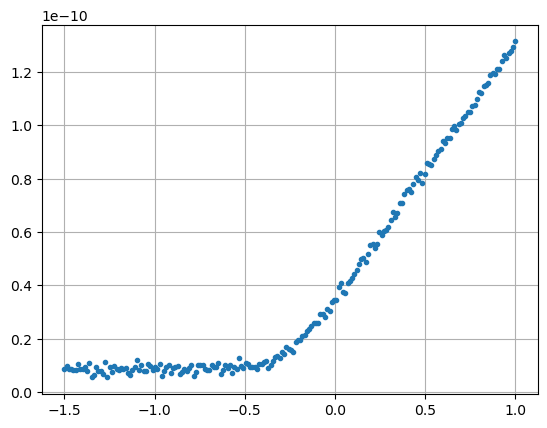

In [83]:
X = data['X']
Y = data['Y']
R = data['R']
T = data['T']
V = data['V']

plt.figure()
plt.subplots()
plt.plot(V,R,'.')
plt.grid()



In [84]:
data.to_csv('Mediciones/barrido_voltaje_720nm.csv', index=False)

# Barrido de longitud de onda

In [ ]:
X = []
Y = []
R = []
T = []
V = []

while True:
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)
    print(medicionXY)
    print(medicionRT)
    print('------------------')
    time.sleep(0.1)

    V.append(i)
    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])

In [ ]:
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'V':V,
                     'R':R,
                     'T':T})

display(data)

In [ ]:
X = np.array(X)*(-1)
Y = np.array(Y)
R = np.array(R)
T = np.array(T)
V = np.array(V)

plt.figure()
plt.subplots()
plt.plot(V,R,'.')
plt.grid()


In [ ]:
data.to_csv('Mediciones/barrido_longitud_.csv', index=False)